### Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 


In [9]:
df = pd.read_csv('SOCR-HeightWeight.csv')

In [10]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [13]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [ ]:
df.drop('Index' , axis = 1 , inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


Text(0, 0.5, 'Height')

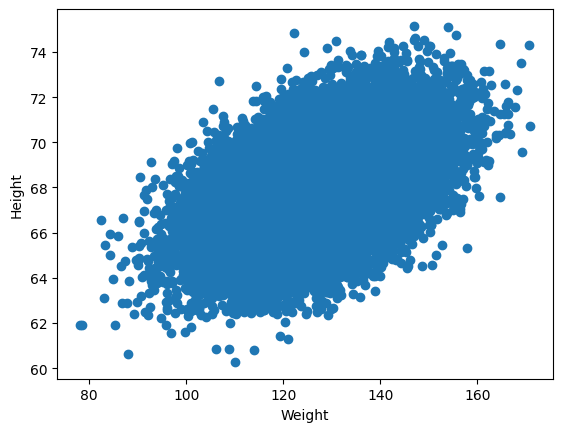

In [25]:
## Scatter plot

plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [26]:
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


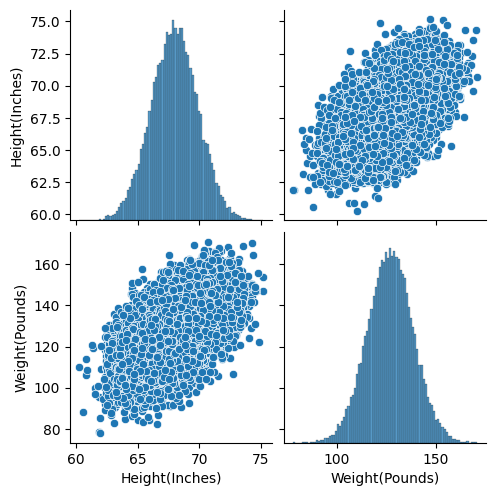

In [28]:
## Seaborn visualization

import seaborn as sns
sns.pairplot(df)


In [35]:
## independent and dependent features

X = df[['Weight(Pounds)']]     ## Independent in train (datadrame or 2d array)  
y = df['Height(Inches)']   ## This variable can be seriees or 1d array


In [36]:
X_series = df['Weight(Pounds)']
np.array(X_series).shape

(25000,)

In [37]:
np.array(y).shape

(25000,)

In [38]:
## Train  Test Split 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [40]:
X_train.shape

(18750, 1)

In [41]:
## Standardize 

from sklearn.preprocessing import StandardScaler


In [44]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)

In [45]:
## for train - fit_transform
## for test - transform (not to be shown)

X_test = scaler.transform(X_test)

In [46]:
X_test

array([[ 0.62053543],
       [-1.29869704],
       [ 0.76685832],
       ...,
       [ 0.73940988],
       [-1.16790419],
       [ 0.00246396]])

In [47]:
## Apply for LR 

from sklearn.linear_model import LinearRegression



In [51]:
regression = LinearRegression(n_jobs=-1)

In [52]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [55]:
print("Coefficient or slope : " ,regression.coef_)
print("Intercept : " ,regression.intercept_)

Coefficient or slope :  [0.94883892]
Intercept :  67.9938252704


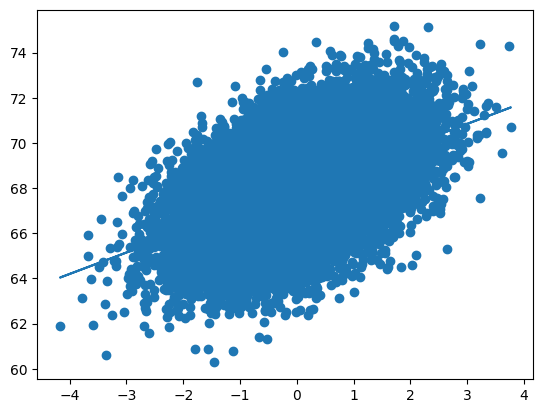

In [57]:
## plot train dataset best fit line


plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

##### prediction of test data

###### 1.predicated height output = intercept + coef_(Weights)
###### 2.y_pred_test = 156.470 + 17.29(X_test)

In [58]:
## Prediction For test data

y_pred = regression.predict(X_test)

In [59]:
## Performance metrics 


from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [60]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse  = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.7333807993730996
1.3166150322297803
1.6532939240719116


In [61]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.2592643941428425


In [62]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.25914583850810224

In [65]:
pip install statsmodels

  Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl.metadata (9.5 kB)
Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl (9.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [66]:
import statsmodels.api as sm

In [67]:
model = sm.OLS(y_train,X_train).fit()

In [69]:
prediction =model.predict(X_test)
print(prediction)

[ 0.58878817 -1.2322543   0.72762503 ...  0.70158088 -1.10815295
  0.0023379 ]


In [70]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Height(Inches)   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.649
Date:                Thu, 05 Dec 2024   Prob (F-statistic):                      0.0561
Time:                        12:47:13   Log-Likelihood:                     -1.0572e+05
No. Observations:               18750   AIC:                                  2.115e+05
Df Residuals:                   18749   BIC:                                  2.115e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [71]:
## Prediction for new data

regression.predict(scaler.transform([[72]]))

c:\Users\Lenovo\OneDrive\Documents\GitHub\Data-Science-Course\environment\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.50061832])

##### Multiple Linear Regression

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
df_index = pd.read_csv('economic_index.csv')

In [22]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [23]:
## Droping the unncessary columns

df_index.drop(columns = ['Unnamed: 0' ,'year','month'],axis = 1 ,inplace = True )

In [24]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [25]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

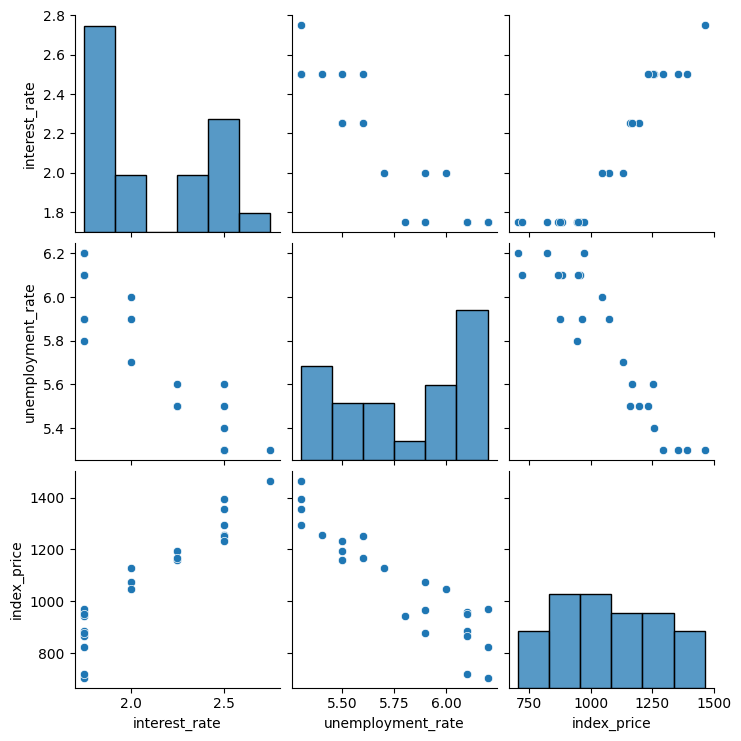

In [26]:
###  seaborn 
import seaborn as sns
sns.pairplot(df_index)

In [27]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

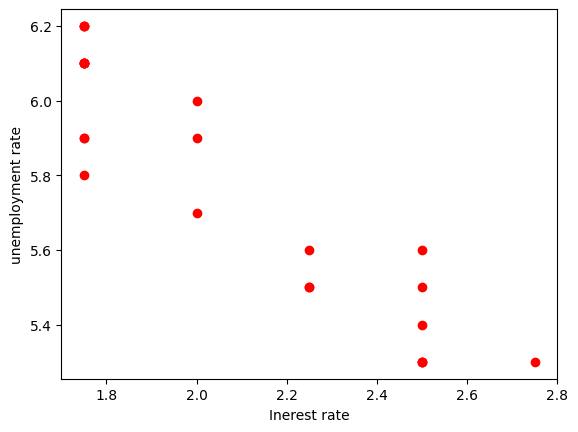

In [28]:
plt.scatter(df_index['interest_rate'] ,df_index['unemployment_rate'],color='r')
plt.xlabel('Inerest rate')
plt.ylabel('unemployment rate')

In [29]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [32]:
# independent and dependent variable 

X = df_index[['interest_rate','unemployment_rate']]
y = df_index['index_price']

In [33]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [34]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [35]:
## Train

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25 , random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
regression = LinearRegression()

In [45]:
regression.fit(X_train,y_train)

LinearRegression()

In [50]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring = 'neg_mean_squared_error',cv=3)

In [53]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [46]:
regression.predict(X_train)

array([ 929.82565018, 1341.42873089,  821.65051903, 1233.25359973,
       1341.42873089,  958.85154593,  857.70889608, 1341.42873089,
       1305.37035383,  821.65051903,  857.70889608,  929.82565018,
        857.70889608, 1204.22770398, 1067.02667708,  965.88402724,
        857.70889608, 1269.31197678])

In [47]:
y_pred = regression.predict(X_test)

In [48]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print(score)

0.8278978091457145


In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


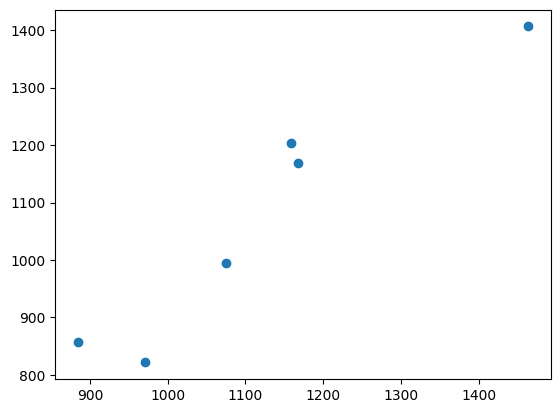

In [55]:
## Assumptions
plt.scatter(y_test,y_pred)

In [56]:
resuiduals = y_test - y_pred
print(resuiduals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


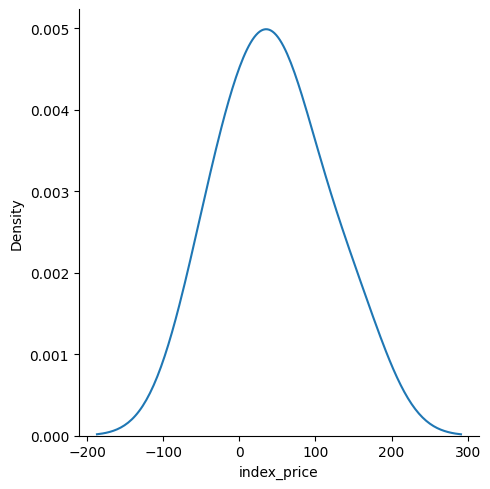

In [57]:
sns.displot(resuiduals,kind = 'kde')

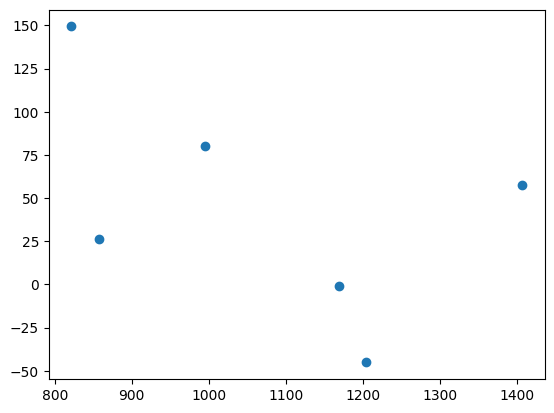

In [58]:
## Scattee plot 

plt.scatter(y_pred,resuiduals)

In [59]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [61]:
prediction = model.predict(X_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [62]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 05 Dec 2024   Prob (F-statistic):                       0.754
Time:                        15:42:18   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Lenovo\OneDrive\Documents\GitHub\Data-Science-Course\environment\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [63]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [64]:
print(regression.intercept_)

1053.4444444444443


### Polynomial Regression


In [3]:
import numpy as np 

import pandas  as pd 

import matplotlib.pyplot  as plt

%matplotlib inline

Text(0, 0.5, 'Y dataset')

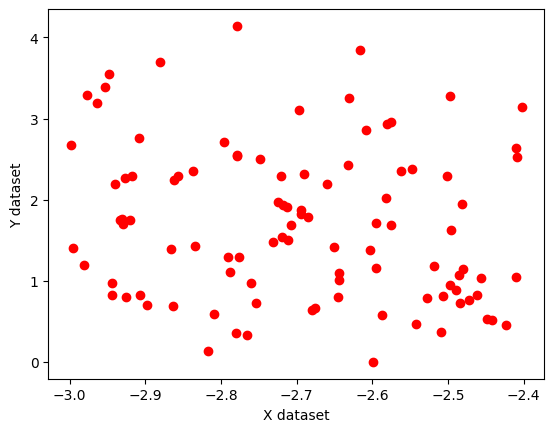

In [4]:
X = 0.6 * np.random.rand(100,1) - 3 
y = 0.5 * X **2 +1.5*X+2+np.random.randn(100,1)
## quadratic equation used = y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y, color = 'r')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')


In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42 )


In [6]:
## let simple linear regression

from sklearn.linear_model import LinearRegression

regression_1 = LinearRegression()

In [8]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [12]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(X_test))
print(score)

-0.2056398634183212


Text(0, 0.5, 'Ylabel')

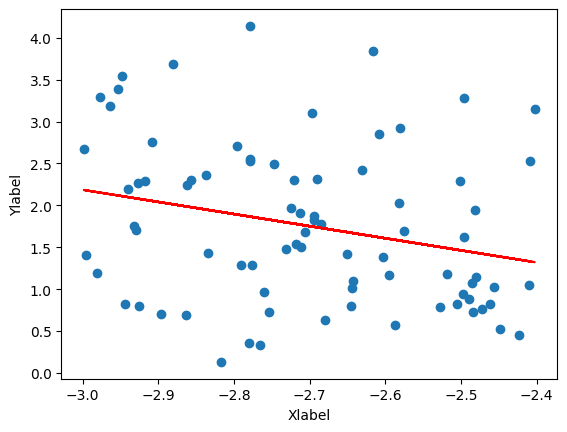

In [13]:
## Lets Visualize this 
plt.plot(X_train,regression_1.predict(X_train),color = 'r')
plt.scatter(X_train,y_train)
plt.xlabel("Xlabel")
plt.ylabel("Ylabel")


In [14]:
## lets apply polynomial transformation

from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree = 2 , include_bias= True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [16]:
X_train_poly

array([[ 1.        , -2.86235086,  8.19305244],
       [ 1.        , -2.60783981,  6.80082849],
       [ 1.        , -2.72427212,  7.42165858],
       [ 1.        , -2.77873758,  7.72138253],
       [ 1.        , -2.60335161,  6.7774396 ],
       [ 1.        , -2.6942995 ,  7.2592498 ],
       [ 1.        , -2.77848579,  7.71998328],
       [ 1.        , -2.69045488,  7.23854744],
       [ 1.        , -2.94853618,  8.69386561],
       [ 1.        , -2.93981741,  8.6425264 ],
       [ 1.        , -2.58753029,  6.69531299],
       [ 1.        , -2.92915628,  8.57995651],
       [ 1.        , -2.75994277,  7.6172841 ],
       [ 1.        , -2.47978308,  6.14932411],
       [ 1.        , -2.78052256,  7.73130571],
       [ 1.        , -2.46111652,  6.05709453],
       [ 1.        , -2.64512563,  6.9966896 ],
       [ 1.        , -2.9251131 ,  8.55628665],
       [ 1.        , -2.85627622,  8.15831386],
       [ 1.        , -2.83730413,  8.05029473],
       [ 1.        , -2.88094461,  8.299

In [17]:
X_test_poly

array([[ 1.        , -2.54746964,  6.48960158],
       [ 1.        , -2.80852187,  7.88779508],
       [ 1.        , -2.86584896,  8.21309024],
       [ 1.        , -2.59859   ,  6.75266999],
       [ 1.        , -2.71825911,  7.38893258],
       [ 1.        , -2.90702515,  8.45079525],
       [ 1.        , -2.63073356,  6.92075908],
       [ 1.        , -2.65985853,  7.07484742],
       [ 1.        , -2.93102198,  8.59088987],
       [ 1.        , -2.50867849,  6.29346774],
       [ 1.        , -2.44181272,  5.96244937],
       [ 1.        , -2.78746588,  7.76996601],
       [ 1.        , -2.54252771,  6.46444717],
       [ 1.        , -2.94462566,  8.67082028],
       [ 1.        , -2.59534386,  6.73580976],
       [ 1.        , -2.67561827,  7.15893315],
       [ 1.        , -2.561586  ,  6.56172286],
       [ 1.        , -2.92011341,  8.5270623 ],
       [ 1.        , -2.5751209 ,  6.63124767],
       [ 1.        , -2.40989888,  5.80761261]])

In [18]:
regression = LinearRegression()

In [19]:
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

-0.20970618810859998


In [20]:
print(regression.intercept_)

[9.07482384]


In [21]:
print(regression.coef_)

[[0.         6.89701687 1.5436613 ]]


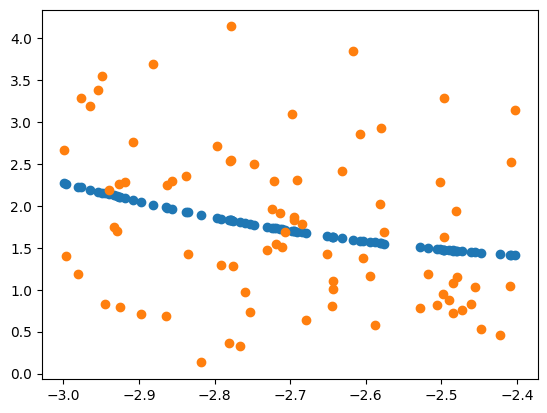

In [23]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [24]:
## Prediction of new data set

X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

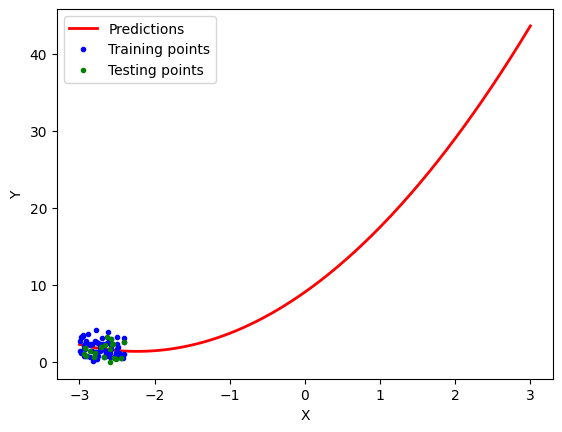

In [27]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new,y_new ,"r-" , linewidth = 2 , label = "Predictions")
plt.plot(X_train,y_train,"b.",label = 'Training points')
plt.plot(X_test,y_test,"g." , label = 'Testing points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Pipeline Concept

In [28]:
from sklearn.pipeline import Pipeline

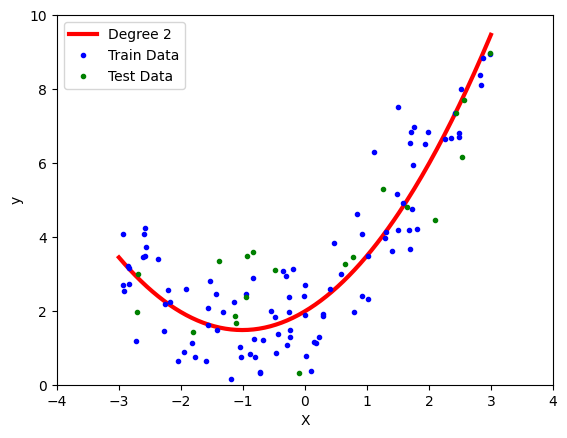

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Example data
X_train = np.random.rand(100, 1) * 6 - 3  # Training data
y_train = 0.5 * X_train**2 + X_train + 2 + np.random.randn(100, 1)  # Quadratic with noise
X_test = np.random.rand(20, 1) * 6 - 3  # Test data
y_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(20, 1)  # Quadratic with noise

def poly_regression(degree):
    # Generate new data for predictions
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    # Define the pipeline
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])

    # Fit the model
    poly_regression.fit(X_train, y_train)

    # Predict with the model
    y_pred_new = poly_regression.predict(X_new)

    # Plot the prediction line
    plt.plot(X_new, y_pred_new, 'r', label=f"Degree {degree}", linewidth=3)
    plt.plot(X_train, y_train, "b.", label="Train Data")
    plt.plot(X_test, y_test, "g.", label="Test Data")
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, 0, 10])
    plt.show()

# Call the function with a desired degree
poly_regression(degree=2)


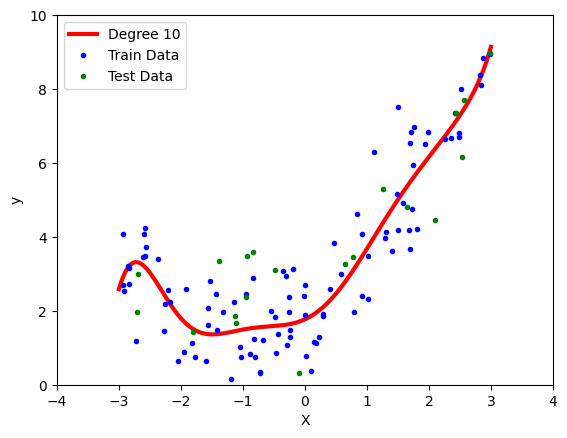

In [35]:
poly_regression(10)

##### Ridge Regression , Lasso Regression , ElasticNet Regression

In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv'  , header = 1)

In [60]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [62]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Data Cleaning

In [117]:
##   missing values

dataset[dataset.isnull().any(axis = 1)]



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [118]:
dataset.loc[:122,"Region"] = 0
dataset.loc[122:,"Region"] = 1
df = dataset

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [119]:
df[['Region']] = df[['Region']].astype(int)

In [120]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [121]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [122]:
##    Removing  the null values 

df=df.dropna().reset_index(drop = True)

In [123]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [124]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [125]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [126]:
## Remove the 122 row 
df =df.drop(122).reset_index(drop= True )

In [128]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [129]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [130]:
## fix spaces in  columns names 
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [132]:
## Changes the required columns as integer data type 

In [133]:
df[['month' , 'day','year','Temperature','RH','Ws']] = df[['month' , 'day','year','Temperature','RH','Ws']] .astype(int)

In [134]:
## changing the otether to float 


objects =[features for features in df.columns if df[features].dtypes == 'O']

In [135]:
for i  in objects :
    if i!='Classes' :
        df[i] = df[i].astype(float)



In [136]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [138]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [139]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [140]:
df.to_csv('Cleaned_dataset.csv')

In [141]:
df_copy =  df.drop(['day','month','year'],axis = 1)

In [142]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [143]:
## encoding

df_copy['Classes']=np.where (df_copy['Classes'].str.contains('not fire') , 0 ,1 )

In [144]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [145]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [149]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


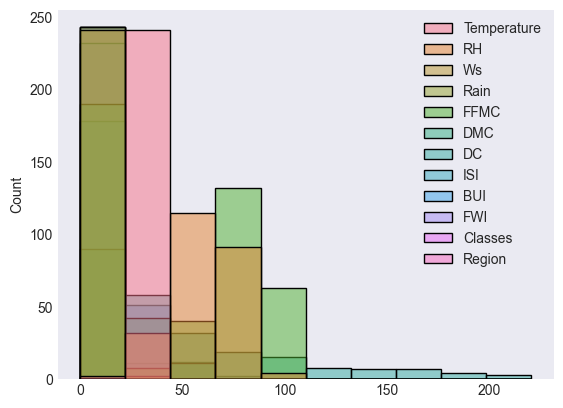

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_copy, bins=10, kde=False)
plt.show()


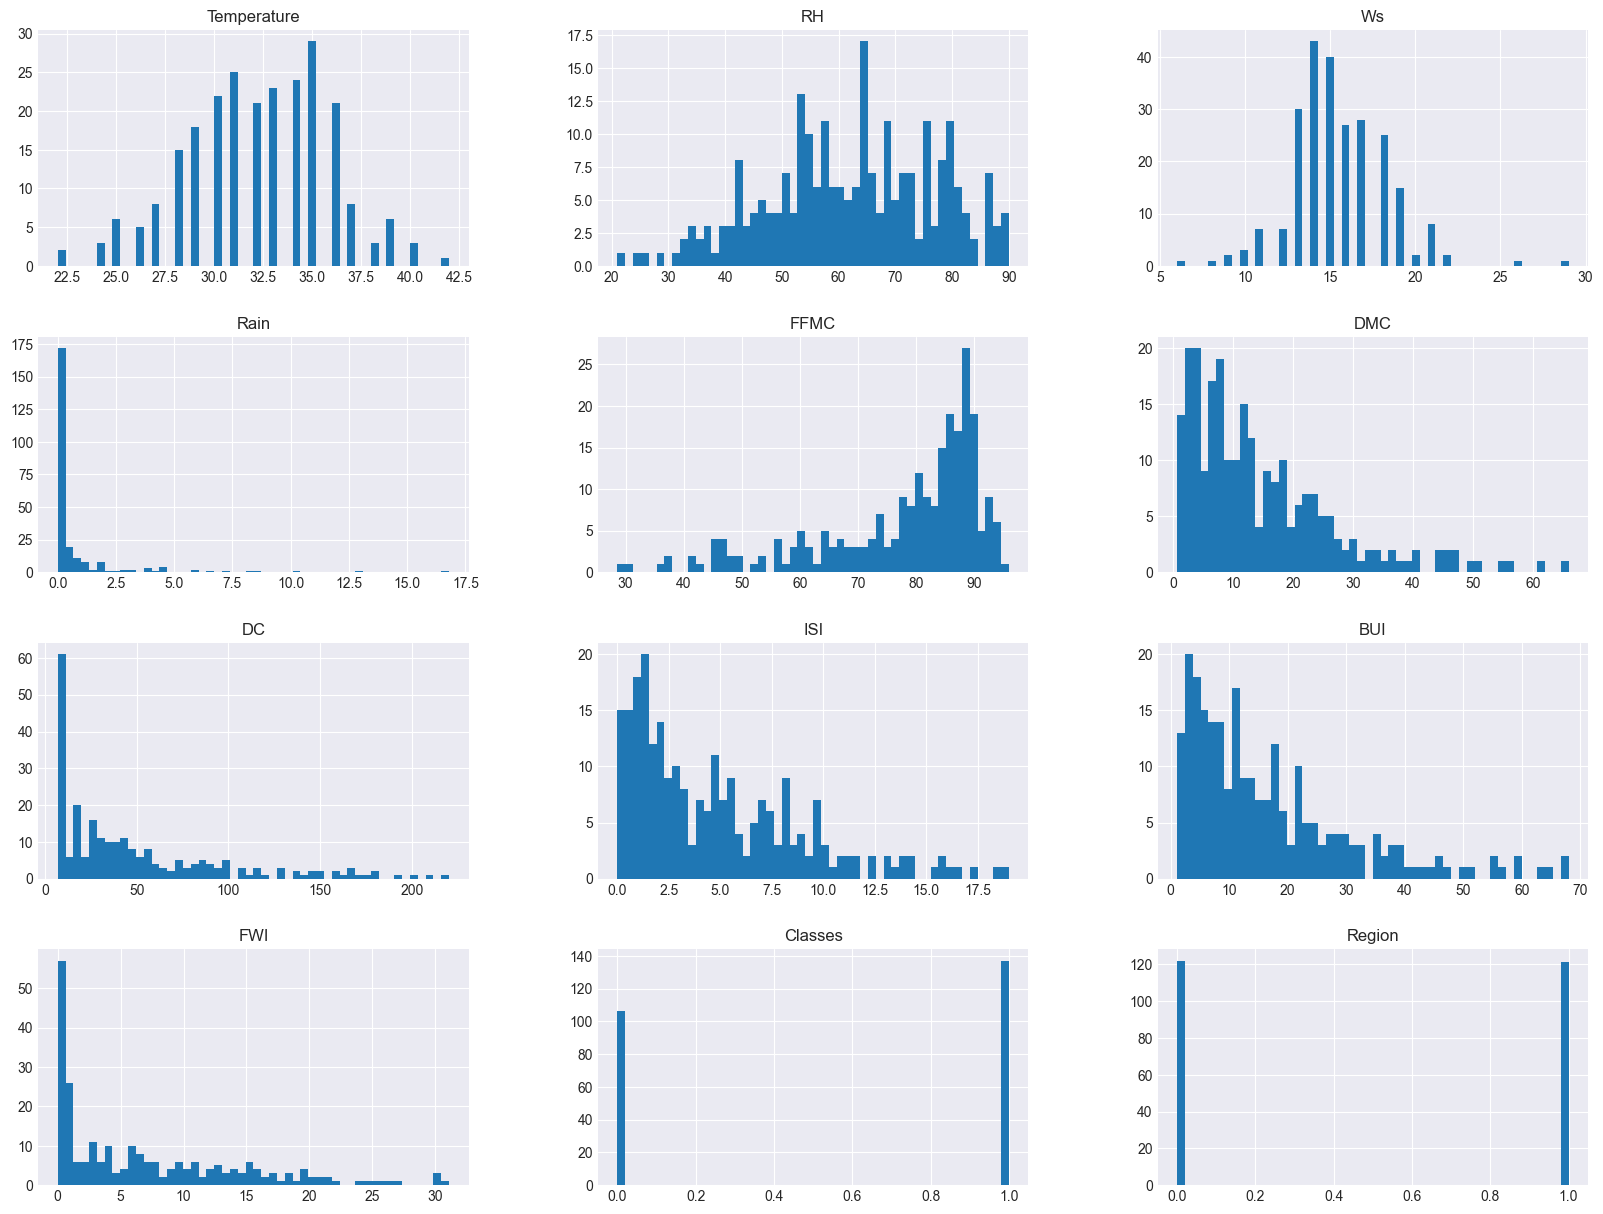

In [152]:
plt.style.use('seaborn-v0_8-dark')  
df_copy.hist(bins=50, figsize=(20, 15))
plt.show()


In [157]:
percentage=df_copy['Classes'].value_counts(normalize = True)*100

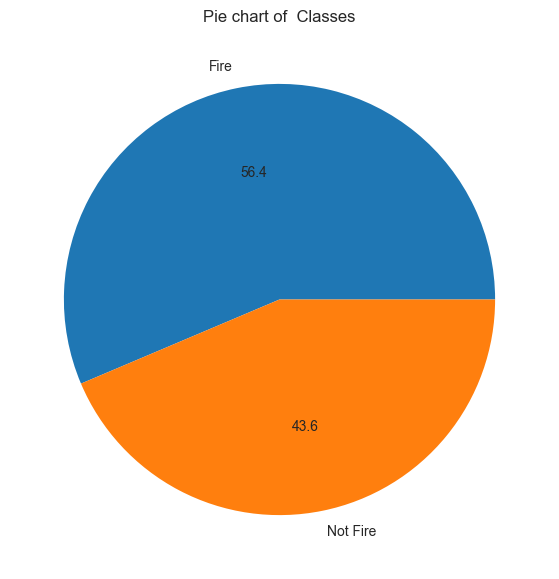

In [158]:
# plotting piechart

classlabels = ["Fire","Not Fire"]
plt.figure(figsize = (12,7))
plt.pie(percentage, labels=classlabels, autopct = '%1.1f' )
plt.title("Pie chart of  Classes")
plt.show()

In [161]:
# Correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

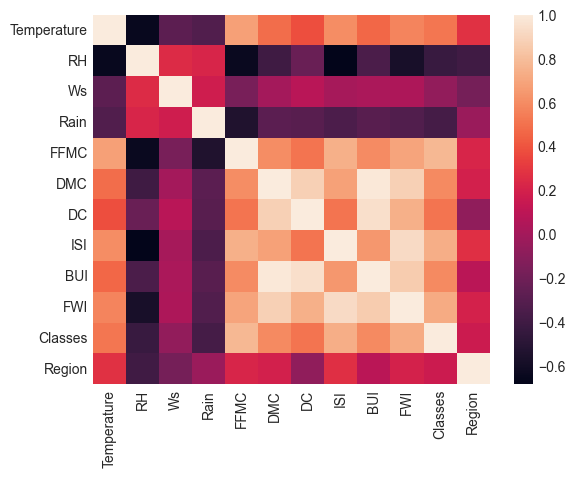

In [165]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

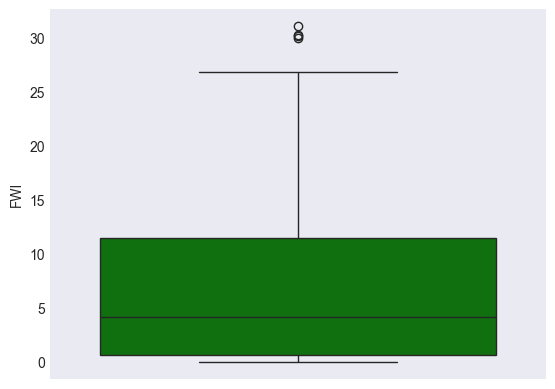

In [166]:
## Box plot 
sns.boxplot(df['FWI'],color = 'green')

In [167]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Text(0.5, 0, 'Months')

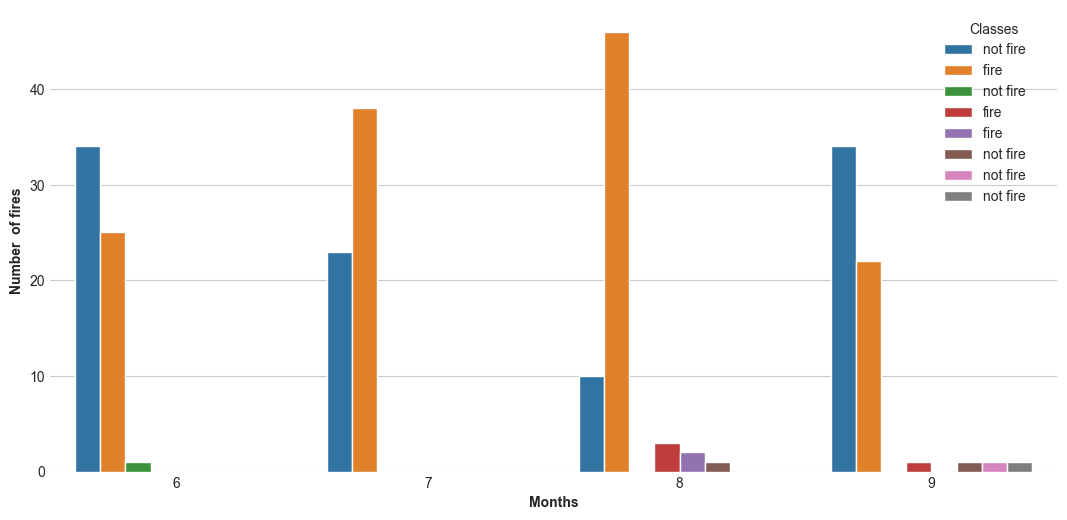

In [170]:
##  Month Fire analysis 

dftemp = df.loc[df['Region'] == 1]

plt.subplots(figsize = (13,6) )
sns.set_style('whitegrid')
sns.countplot(x='month' , hue = 'Classes' , data = df)
plt.ylabel('Number  of fires' , weight = 'bold')
plt.xlabel('Months' , weight = 'bold' )

In [171]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
df = pd.read_csv()